<a href="https://colab.research.google.com/github/srija-guda/LSTM---ML-Assn-5/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Classroom/1st Sem 2024-25 (BITS F464: Machine Learning)/household_power_consumption.txt'

In [ ]:
df = pd.read_csv(file_path, sep=";")

<ipython-input-5-f707002b096f>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";")


In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df = df.drop(columns=['Date', 'Time'])

In [ ]:
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
scaler = MinMaxScaler()
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size

train = df.iloc[:train_size]
test = df.iloc[train_size:]


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        # Extract look_back rows and all columns (features)
        a = dataset.iloc[i:(i + look_back), :].values  # Use ':' to select all columns
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])  # Target is still from the first column
    return np.array(dataX), np.array(dataY)


In [ ]:
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
model = Sequential()
model.add(LSTM(20, input_shape=(look_back, 7)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=128, verbose=1)
model.save('energy_pred.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 9.6322e-04
Epoch 2/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 5.7223e-04
Epoch 3/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 5.5499e-04
Epoch 4/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.5375e-04
Epoch 5/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.3924e-04
Epoch 6/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 5.3366e-04
Epoch 7/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 5.2516e-04
Epoch 8/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 5.1854e-04
Epoch 9/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.1002e-04
Epoch 10/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 5.1287e-04
Epoch 11/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.0453e-04
Epoch 12/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 4.9995e-04
Epoch 13/20
10727/10727 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.0141e-04
Epoch 14

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

42907/42907 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step
21134/21134 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step


Train RMSE: 0.244
Train MAE: 0.096


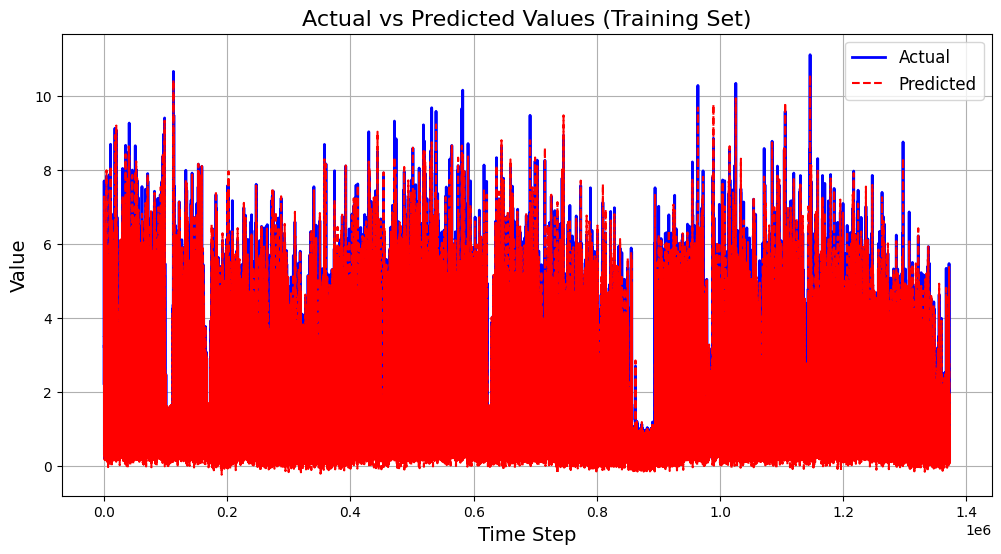

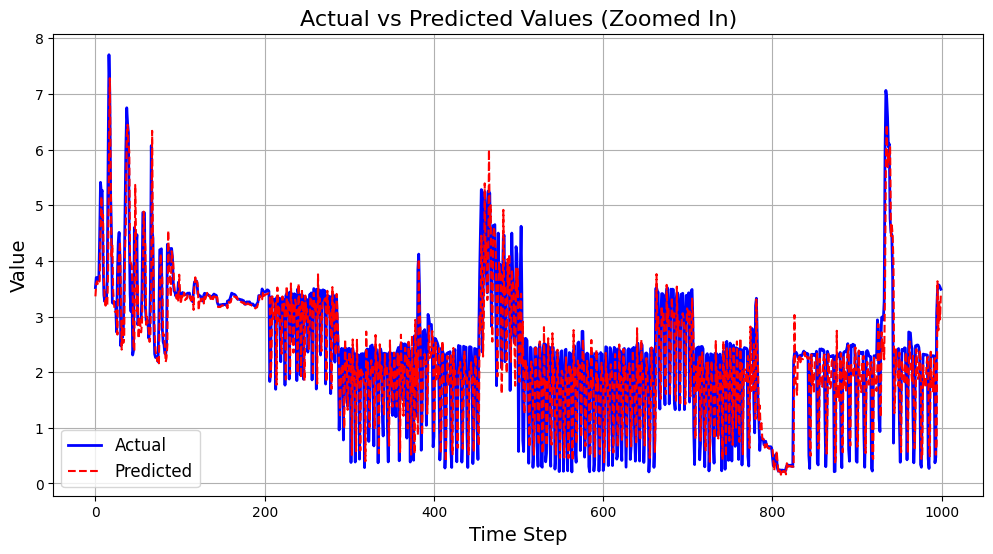

In [ ]:
train_X_last_timestep = trainX[:, -1, :]

inv_yhat = np.concatenate((trainPredict, train_X_last_timestep[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

train_y = trainY.reshape((len(trainY), 1))
inv_y = np.concatenate((train_y, train_X_last_timestep[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Train RMSE: %.3f' % rmse)

mae = mean_absolute_error(inv_y, inv_yhat)
print('Train MAE: %.3f' % mae)

plt.figure(figsize=(12, 6))
plt.plot(inv_y, label='Actual', color='blue', linewidth=2)
plt.plot(inv_yhat, label='Predicted', color='red', linestyle='--')

plt.title('Actual vs Predicted Values (Training Set)', fontsize=16)
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

start, end = 0, 1000
plt.figure(figsize=(12, 6))
plt.plot(inv_y[start:end], label='Actual', color='blue', linewidth=2)
plt.plot(inv_yhat[start:end], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Zoomed In)', fontsize=16)
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Test RMSE: 0.216
Test MAE: 0.091


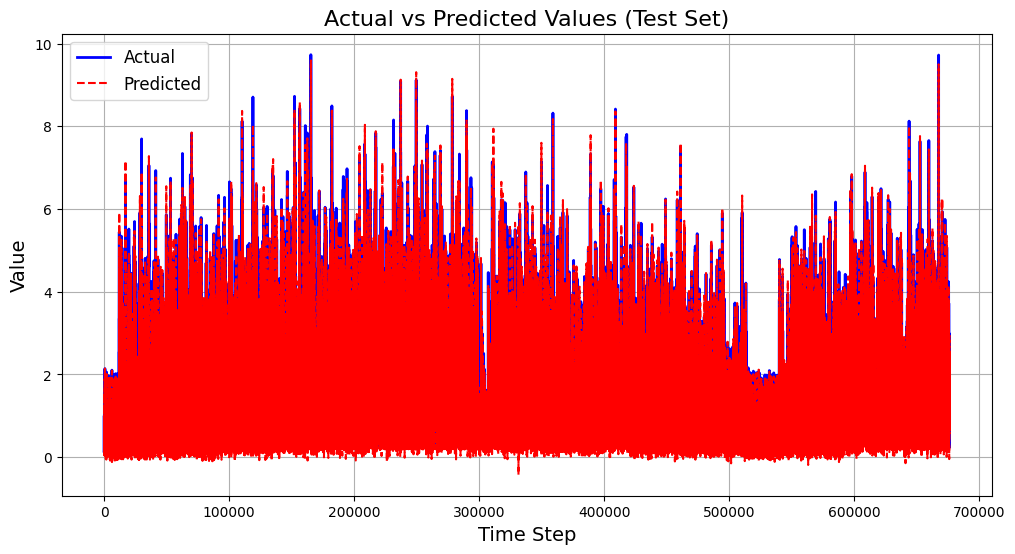

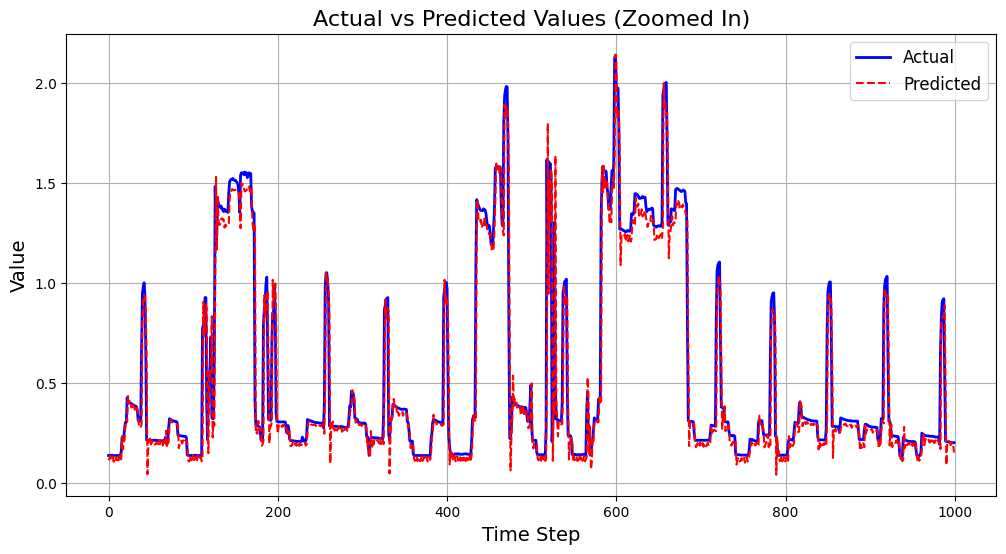

In [ ]:
test_X_last_timestep = testX[:, -1, :]

inv_yhat = np.concatenate((testPredict, test_X_last_timestep[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

test_y = testY.reshape((len(testY), 1))
inv_y = np.concatenate((test_y, test_X_last_timestep[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)

plt.figure(figsize=(12, 6))
plt.plot(inv_y, label='Actual', color='blue', linewidth=2)
plt.plot(inv_yhat, label='Predicted', color='red', linestyle='--')

plt.title('Actual vs Predicted Values (Test Set)', fontsize=16)
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

start, end = 0, 1000
plt.figure(figsize=(12, 6))
plt.plot(inv_y[start:end], label='Actual', color='blue', linewidth=2)
plt.plot(inv_yhat[start:end], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Zoomed In)', fontsize=16)
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
